In [5]:
import pandas as pd

# Load the Airbnb listings data into a Pandas DataFrame
df = pd.read_csv('Airbnb_Open_Data.csv')

# Drop unnecessary columns
df = df.drop(['host id', 'host_identity_verified', 'host name', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'Construction year', 'service fee', 'review rate number', 'calculated host listings count', 'house_rules', 'license'], axis=1)

# Check for missing values
print(df.isna().sum())

# Drop rows with missing values for the 'last_review' column
df = df.dropna(subset=['last review'])

# Fill in missing values for the 'reviews per month' column with the mean value
df['reviews per month'] = df['reviews per month'].fillna(df['reviews per month'].mean())

# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Export cleaned dataset to CSV file
df.to_csv('cleaned_airbnb_listings.csv', index=False)


C:\Users\Shri.DESKTOP-3RITHQH\AppData\Local\Temp\ipykernel_13088\2707357933.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


id                         0
NAME                     250
neighbourhood group       29
neighbourhood             16
lat                        8
long                       8
room type                  0
price                    247
minimum nights           409
number of reviews        183
last review            15893
reviews per month      15879
availability 365         448
dtype: int64
480


In [16]:
# Import pandas
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_airbnb_listings.csv')

# Remove dollar sign and commas from the "price" column
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')

# Convert the "price" column to a float dtype
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Calculate the mean price across all listings
numeric_prices = df['price'][~df['price'].isna()]
mean_price = numeric_prices.mean()

# Calculate the mean price and number of listings in each neighborhood
neighborhood_stats = df.groupby('neighbourhood')['price'].agg(['mean', 'count'])

# Print the results
print('Mean price across all listings: ${:.2f}'.format(mean_price))
print('\nNeighborhood statistics:')
print(neighborhood_stats)


C:\Users\Shri.DESKTOP-3RITHQH\AppData\Local\Temp\ipykernel_13088\3832549164.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '')


Mean price across all listings: $626.11

Neighborhood statistics:
                       mean  count
neighbourhood                     
Allerton         667.556818     88
Arden Heights    804.888889      9
Arrochar         612.408163     49
Arverne          652.530000    200
Astoria          638.375959   1564
...                     ...    ...
Windsor Terrace  594.248227    282
Woodhaven        624.646341    164
Woodlawn         587.137931     29
Woodrow           78.000000      1
Woodside         644.083503    491

[223 rows x 2 columns]


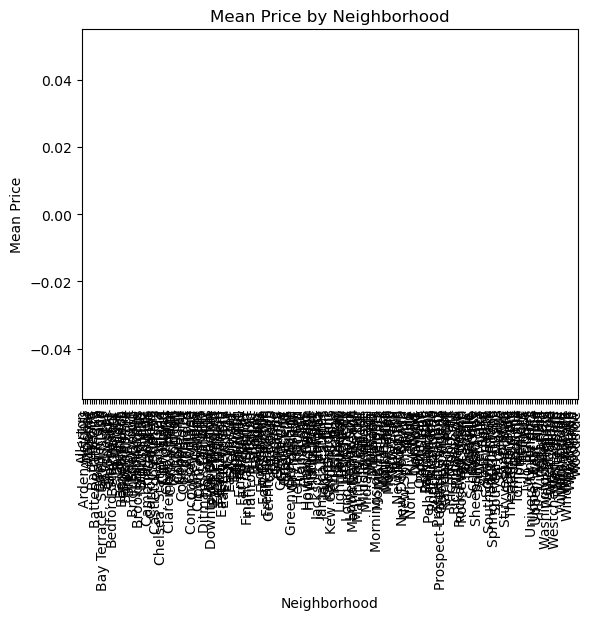

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_airbnb_listings.csv')

# Convert the 'price' column to a numeric data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Calculate the mean price and number of listings in each neighborhood
neighborhood_stats = df.groupby('neighbourhood')['price'].agg(['mean', 'count'])

# Sort the neighborhoods by mean price
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)

# Create a bar chart of mean price by neighborhood
neighborhood_stats.plot(kind='bar', y='mean', legend=False)
plt.title('Mean Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.show()


In [4]:
# Check for missing values in the dataset
print(df.isnull().sum())


id                       0
NAME                   214
neighbourhood group     25
neighbourhood           16
lat                      7
long                     7
room type                0
price                  221
minimum nights         339
number of reviews       59
last review              0
reviews per month        0
availability 365       180
dtype: int64


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_airbnb_listings.csv', usecols=['id', 'NAME', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'room type', 'price', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'availability 365'])

# Drop the rows with missing values in the target variable 'price'
df.dropna(subset=['price'], inplace=True)

# Define the target variable
y = df['price']

# Define the features
X = df[['lat', 'long', 'minimum nights', 'number of reviews', 'reviews per month', 'availability 365', 'room type']]

# Convert the 'room type' feature into numerical values using one-hot encoding
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
room_type = pd.DataFrame(enc.fit_transform(X[['room type']]))
room_type.columns = enc.get_feature_names(['room_type'])
room_type.index = X.index
X = pd.concat([X.drop('room type', axis=1), room_type], axis=1)

# Impute missing values in the features
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=['lat', 'long', 'minimum nights', 'number of reviews', 'reviews per month', 'availability 365', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'room_type_unknown'])

# Remove the '$' sign and convert the 'price' column to float values
y = y.astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print(X.shape)
print(y.shape)


C:\Users\Shri.DESKTOP-3RITHQH\Anaconda (New)\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Shri.DESKTOP-3RITHQH\AppData\Local\Temp\ipykernel_9848\4213341276.py:33: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y = y.astype(str).str.replace('$', '').str.replace(',', '').astype(float)


Root Mean Squared Error: 332.6566685031111
(86005, 10)
(86005,)
